
# **Arithmetic and Bitwise Operations**

#### **In this lesson we'll learn:**
1. Arithmetic Operations
2. Bitwise Operations

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-04-29 07:42:22--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.66
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.7MB/s    in 1.6s    

2023-04-29 07:42:24 (17.7 MB/s) - ‘images.zip’ saved [29586716/29586716]



## **Arithmetic Operations**

These are simple operations that allow us to directly add or subract to the color intensity.

Calculates the per-element operation of two arrays. The overall effect is increasing or decreasing brightness.

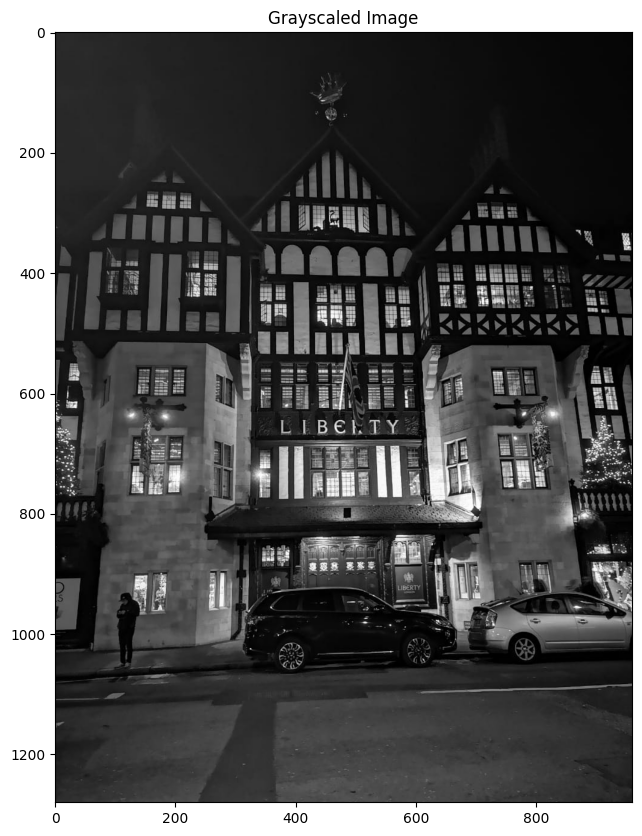

[[41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 ...
 [41 42 44 ... 34 33 32]
 [43 44 46 ... 31 30 28]
 [44 45 46 ... 32 30 29]]


In [ ]:
# Adding comma zero in cv2.imread loads our image in as a grayscaled image
image = cv2.imread('images/liberty.jpeg', 0)
imshow("Grayscaled Image",image)
print(image)

# Create a matrix of ones, then multiply it by a scaler of 100
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100



In [ ]:
print(M)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


#### **Increasing Brightness**

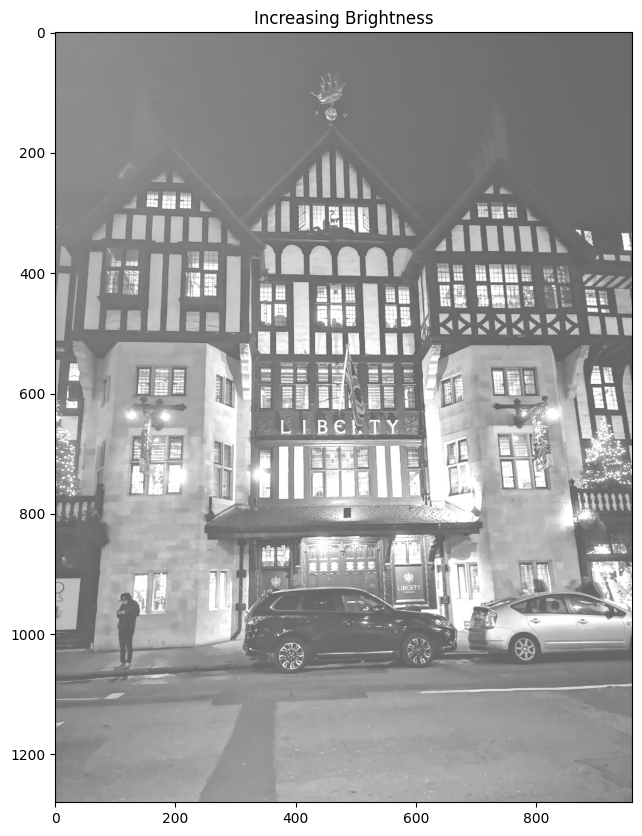

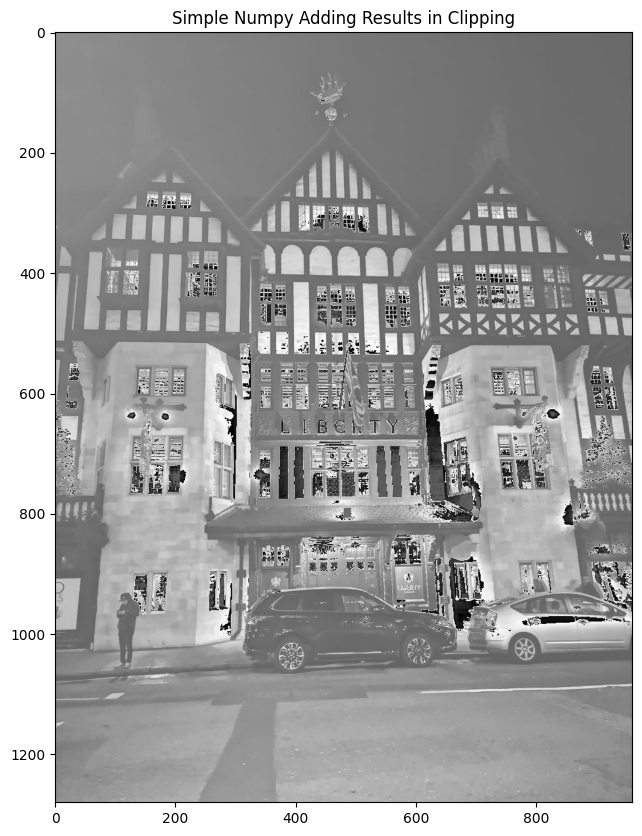

In [ ]:
# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(image, M)
imshow("Increasing Brightness", added)

# Now if we just added it, look what happens
added2 = image + M
imshow("Simple Numpy Adding Results in Clipping", added2)

#### **Decreasing Brightness**

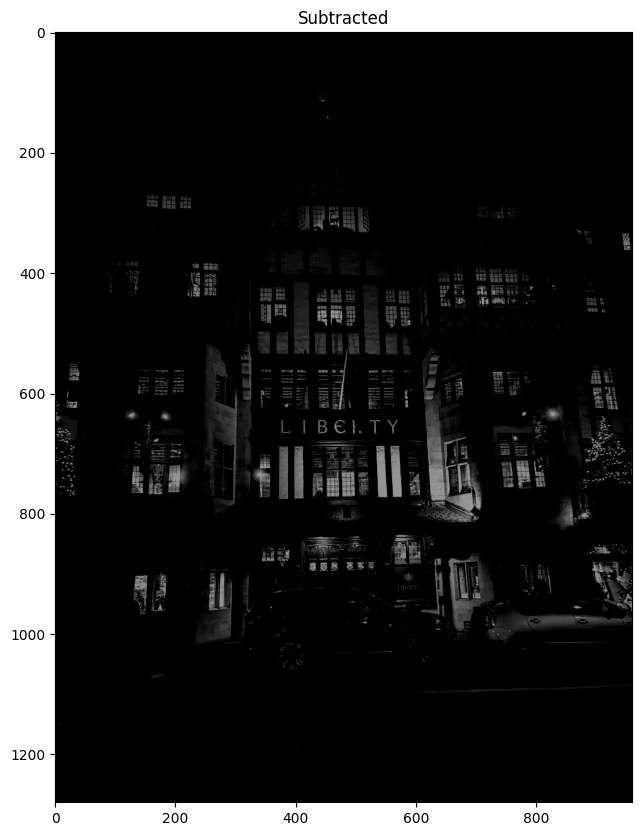

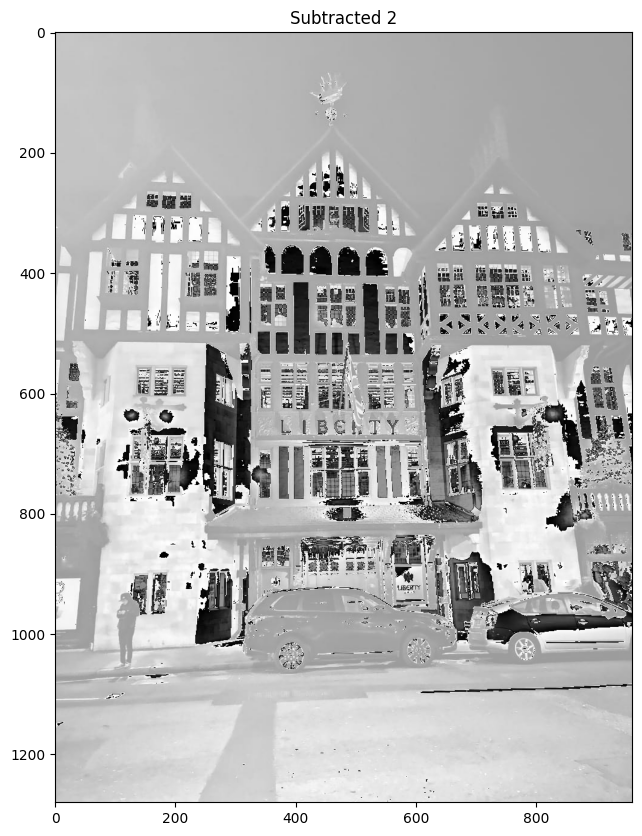

In [ ]:
# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(image, M)
imshow("Subtracted", subtracted)

subtracted = image - M
imshow("Subtracted 2", subtracted)


## **Bitwise Operations and Masking**

To demonstrate these operations let's create some simple images

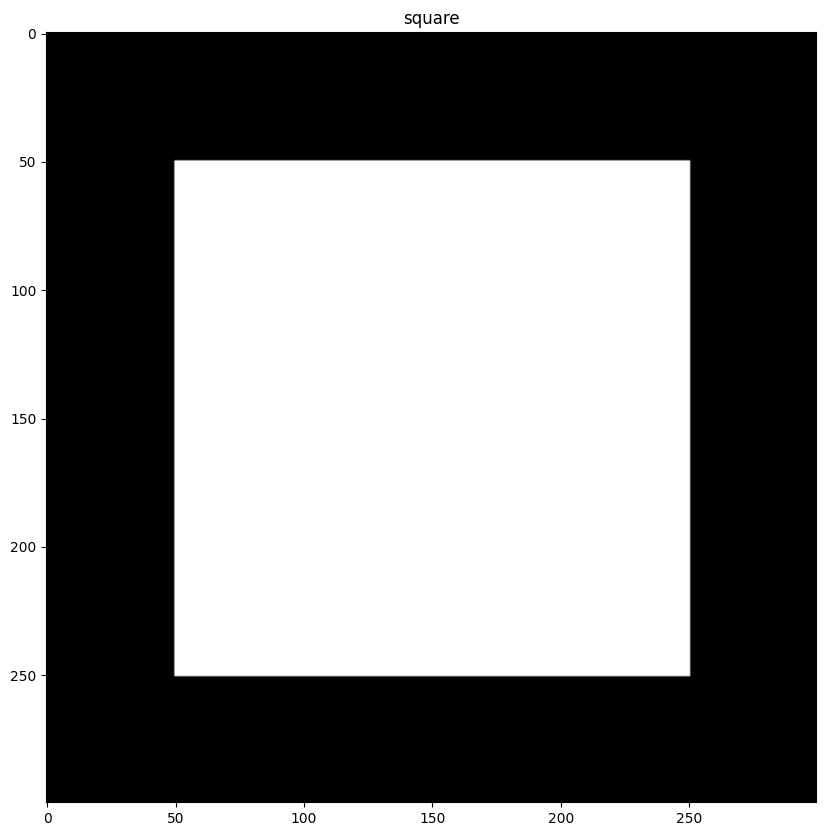

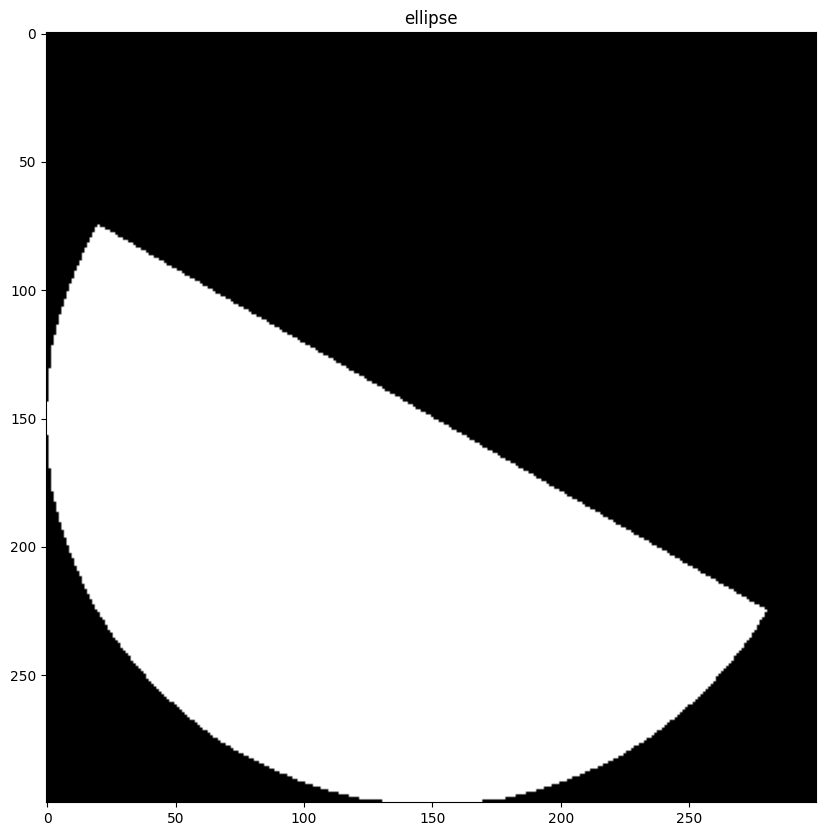

In [ ]:
# If you're wondering why only two dimensions, well this is a grayscale image,

# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
imshow("square", square)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
imshow("ellipse", ellipse)

### **Experimenting with some bitwise operations such as AND, OR, XOR and NOT**

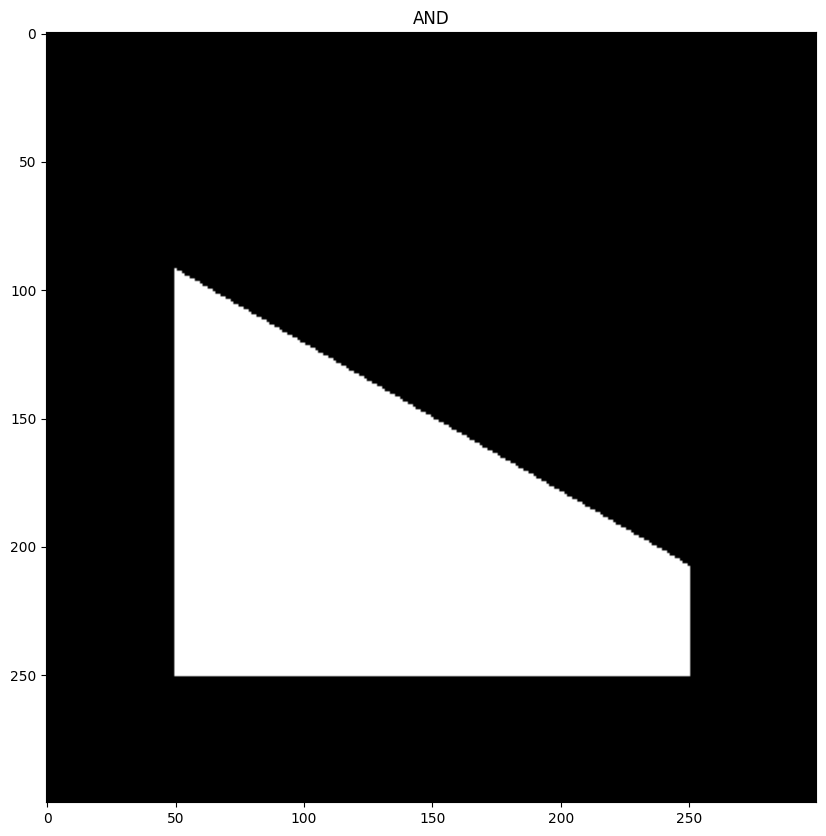

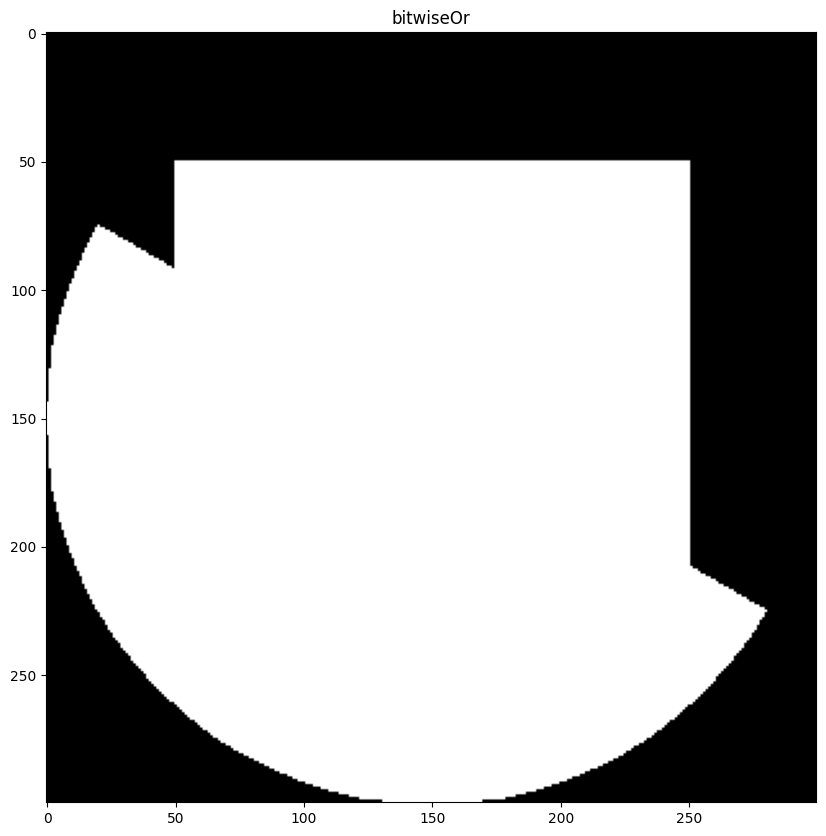

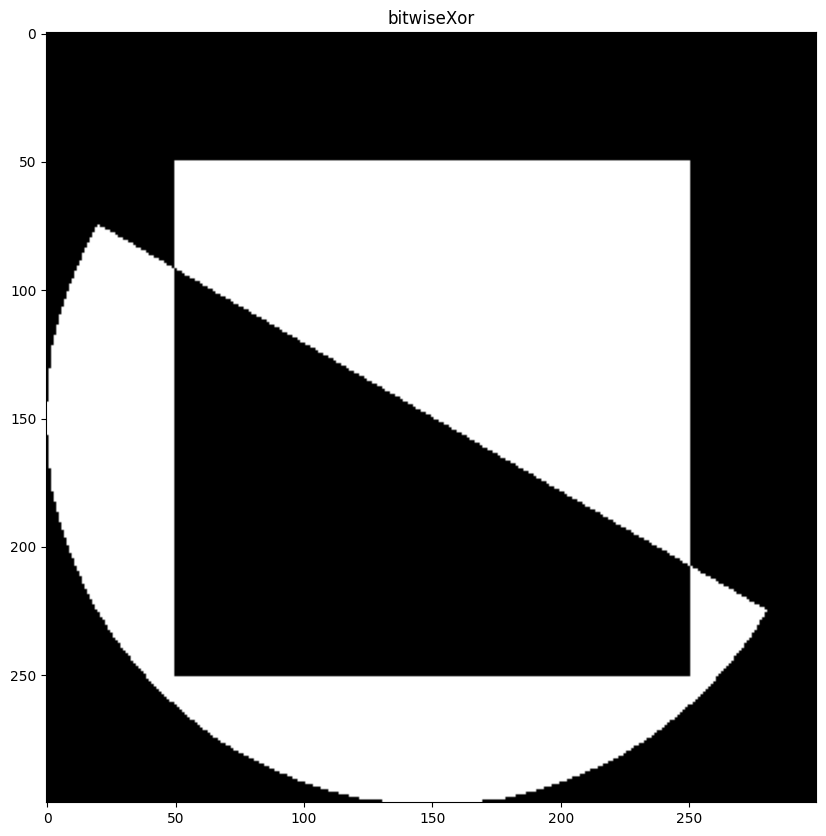

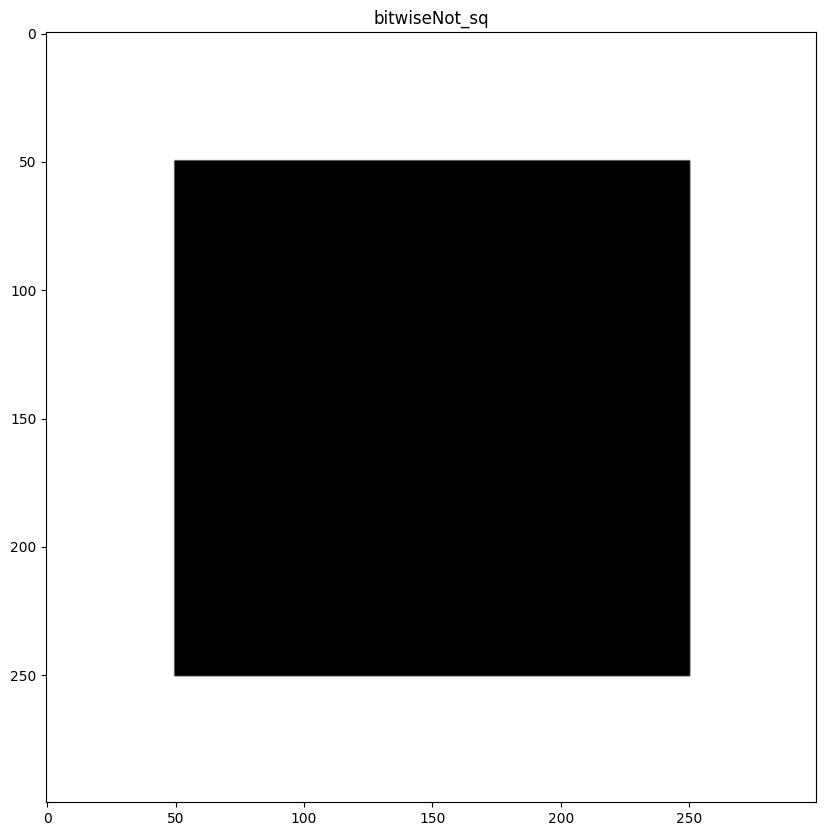

In [ ]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
imshow("AND", And)

# Shows where either square or ellipse is
bitwiseOr = cv2.bitwise_or(square, ellipse)
imshow("bitwiseOr", bitwiseOr)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
imshow("bitwiseXor", bitwiseXor)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
imshow("bitwiseNot_sq", bitwiseNot_sq)

# Notice the last operation inverts the image totally

### **Image Blending:**
- This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency.

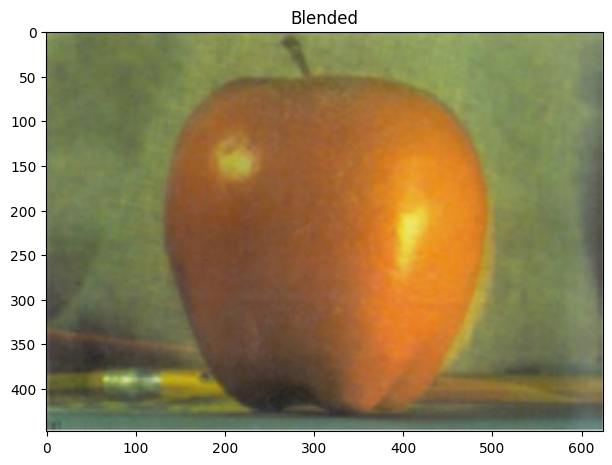

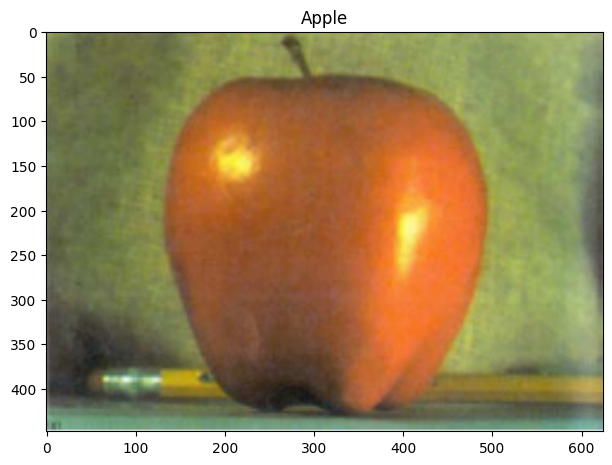

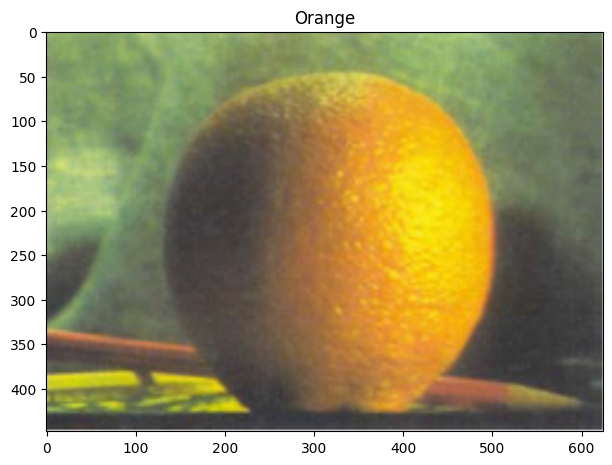

In [ ]:
img1 = cv2.imread('/content/6.1. apple.png')
img2 = cv2.imread('/content/6.2. orange.png')

out = cv2.addWeighted(img1,0.65,img2,0.3,0.5)
imshow('Blended',out)
imshow('Apple',img1)
imshow('Orange',img2)